### mini_project_conversion

In [129]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#### 1. Загрузка данных, проверка числа наблюдений и столбцов, типов данных, наличия пропущенных значений, уникальных значений

In [130]:
# Чтение файла, предварительный просмотр датасета
conversion = pd.read_csv('conversion.csv')
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [131]:
# Просмотр количества наблюдений и столбцов в датасете
print("{0} строки, {1} столбцов".format(conversion.shape[0], conversion.shape[1]))

1143 строки, 11 столбцов


In [132]:
# Проверка типов данных в датасете
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [133]:
# Проверка наличия пропущенных значений
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [134]:
# Проверка количества уникальных кампаний в базе компании X
conversion.xyz_campaign_id.value_counts().count()

3

In [135]:
# Просмотр уникальных возрастных групп
conversion.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

#### 2. Построение графика распределения числа показов для каждой рекламной кампании в Facebook с прологарифмированными значениями.

In [136]:
# Группировка значений по кампаниям в Facebook и подсчёт количества показов
fb_impressions = conversion \
                            .groupby('fb_campaign_id') \
                            .agg({'Impressions':'sum'})

In [137]:
# Логарифмирование значений
log_fb_impressions = np.log(fb_impressions)

Распределение бимодальное и не является нормальным


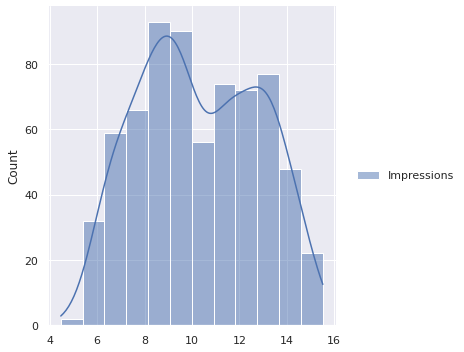

In [138]:
# Посстроение графика распределения 
sns.displot(log_fb_impressions, kde=True)
print('Распределение бимодальное и не является нормальным')

#### 3. Подсчёт метрики CTR

In [139]:
conversion = conversion.assign(CTR = conversion.Clicks / conversion.Impressions)

In [140]:
# Поиск ID рекламной кампании с наибольшим CTR
conversion.iloc[conversion.CTR.idxmax()]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
Impressions                   944
Clicks                          1
Spent                        1.42
Total_Conversion                1
Approved_Conversion             0
CTR                    0.00105932
Name: 150, dtype: object

#### 4. Визуализиция CTR разных рекламных кампаний компании X

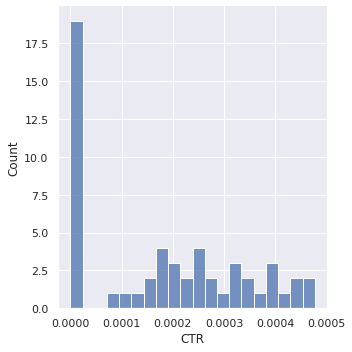

In [141]:
sns.displot(conversion.query('xyz_campaign_id == 916').CTR, bins=20)

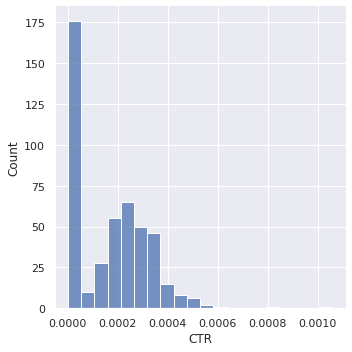

In [142]:
sns.displot(conversion.query('xyz_campaign_id == 936').CTR, bins=20)

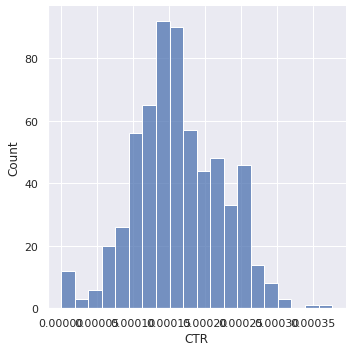

In [143]:
sns.displot(conversion.query('xyz_campaign_id == 1178').CTR, bins=20)

#### 5. Подсчёт метрики CPC 

In [144]:
conversion = conversion.assign(CPC = conversion.Spent / conversion.Clicks)

In [145]:
conversion.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

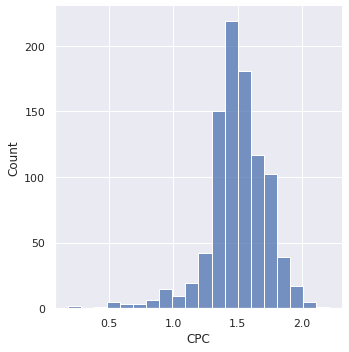

In [146]:
# Визуализация распределения CPC
sns.displot(conversion.CPC.dropna(), bins=20)

In [147]:
# Вычисление межквартильного размаха CPC
scipy.stats.iqr(conversion.CPC, nan_policy='omit').round(2)

0.25

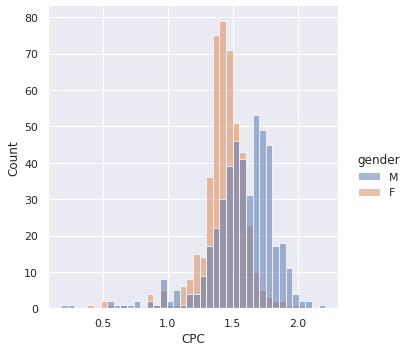

In [152]:
# Визуализация распределения CPC с разбивкой по полу пользователя
sns.displot(data=conversion.dropna(), x='CPC', hue='gender')

#### 6. Подсчёт метрики Conversion Rate

In [167]:
conversion = conversion.assign(conversion_rate = (conversion.Approved_Conversion / conversion.Clicks).mul(100))
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0


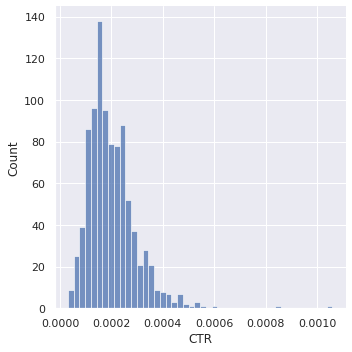

In [166]:
# Визуализация распределения Conversion Rate
sns.displot(data=conversion.dropna(), x='CTR')

In [189]:
# Поиск Conversion Rate для рекламного объявления с ID 1121814 
round((conversion.query('ad_id == 1121814').conversion_rate.to_list()[0]), 2)

3.09